In [18]:
#import wave simulation module
import wavetorch

#import python libraries
import torch
import numpy as np

#Visualization libraries
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns


#Write Libraries
from pathlib import Path
import imageio
import pandas as pd

import time

# Configure GPU/CPU Usage

In [2]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  
print(dev)

cuda:0


In [3]:
torch.set_default_tensor_type('torch.cuda.FloatTensor')

# Initialize Parameters

In [4]:
#Create x and y 2d array to calculate function over
N_x=480
N_y=640
N_t=2400
dx=0.5
dy=0.5
dt=0.2
c=1

"""
Generate grid containing x and y coordinates
Dimension 1: x value
Dimension 2: y value
"""
xs = torch.linspace(0, (N_x-1)*dx, steps=N_x)
ys = torch.linspace(0, (N_y-1)*dy, steps=N_y)

#Create meshgrid
x_space, y_space = torch.meshgrid(xs, ys, indexing='xy')

r_space = x_space + y_space

In [5]:
r_space.shape

torch.Size([640, 480])

In [6]:
#Pack wave metadata into dictionary
u_meta = {'dx':dx,
          'dy':dy,
          'dt':dt,
          'c':c,
          'N_t':N_t}

Text(0.5, 1.0, 'u1 at t=0')

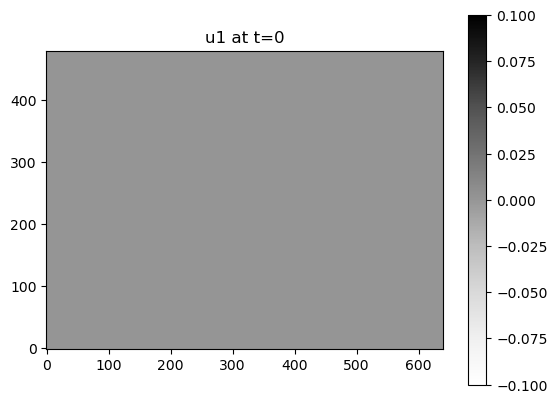

In [7]:
#Generate flat function
u1_t0 = torch.zeros((N_x,N_y)).to(device)
plt.figure()
plt.imshow(u1_t0.cpu().numpy(), cmap=cm.get_cmap(name='Greys'), origin='lower')
plt.colorbar()
plt.title('u1 at t=0')

In [8]:
#Create list of function nodes
g_r1 = [{'coordinate':(int(N_x/3),int(N_y/3)), 'function':(lambda t: np.sin(.08*np.pi*t))},
        {'coordinate':(int(N_x/2),int(N_y/2)), 'function':(lambda t: np.sin(.12*np.pi*t))}]

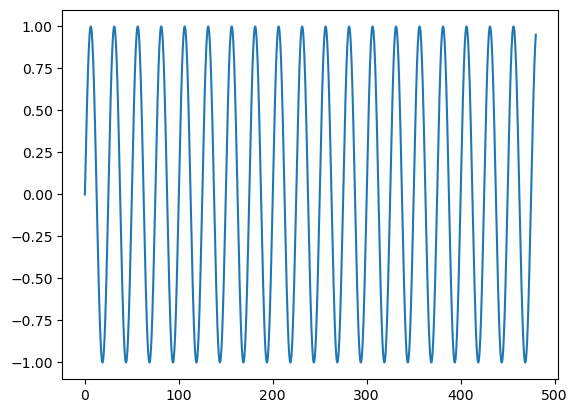

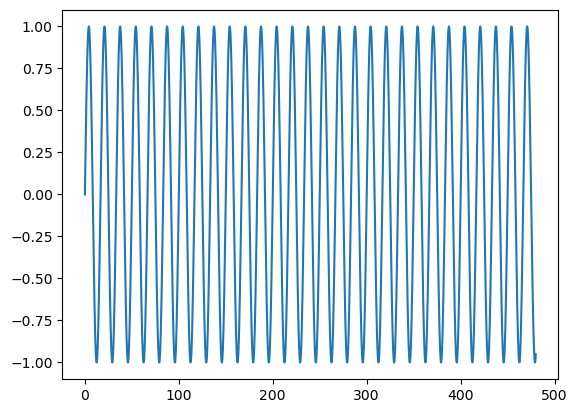

In [9]:
#Plot g functions
for g in g_r1:
    t_temp = np.linspace(0, N_t*dt, N_t+1)
    plt.figure()
    plt.plot(t_temp, g['function'](t_temp))

# Calculate wave simulations

In [10]:
st = time.time()
data1 = wavetorch.wave_eq(u1_t0, g_r1, u_meta)
et = time.time()
data1
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Calculating time step 0 out of 2400
Calculating time step 1 out of 2400
Calculating time step 2 out of 2400
Calculating time step 3 out of 2400
Calculating time step 4 out of 2400
Calculating time step 5 out of 2400
Calculating time step 6 out of 2400
Calculating time step 7 out of 2400
Calculating time step 8 out of 2400
Calculating time step 9 out of 2400
Calculating time step 10 out of 2400
Calculating time step 11 out of 2400
Calculating time step 12 out of 2400
Calculating time step 13 out of 2400
Calculating time step 14 out of 2400
Calculating time step 15 out of 2400
Calculating time step 16 out of 2400
Calculating time step 17 out of 2400
Calculating time step 18 out of 2400
Calculating time step 19 out of 2400
Calculating time step 20 out of 2400
Calculating time step 21 out of 2400
Calculating time step 22 out of 2400
Calculating time step 23 out of 2400
Calculating time step 24 out of 2400
Calculating time step 25 out of 2400
Calculating time step 26 out of 2400
Calculating

Calculating time step 236 out of 2400
Calculating time step 237 out of 2400
Calculating time step 238 out of 2400
Calculating time step 239 out of 2400
Calculating time step 240 out of 2400
Calculating time step 241 out of 2400
Calculating time step 242 out of 2400
Calculating time step 243 out of 2400
Calculating time step 244 out of 2400
Calculating time step 245 out of 2400
Calculating time step 246 out of 2400
Calculating time step 247 out of 2400
Calculating time step 248 out of 2400
Calculating time step 249 out of 2400
Calculating time step 250 out of 2400
Calculating time step 251 out of 2400
Calculating time step 252 out of 2400
Calculating time step 253 out of 2400
Calculating time step 254 out of 2400
Calculating time step 255 out of 2400
Calculating time step 256 out of 2400
Calculating time step 257 out of 2400
Calculating time step 258 out of 2400
Calculating time step 259 out of 2400
Calculating time step 260 out of 2400
Calculating time step 261 out of 2400
Calculating 

Calculating time step 453 out of 2400
Calculating time step 454 out of 2400
Calculating time step 455 out of 2400
Calculating time step 456 out of 2400
Calculating time step 457 out of 2400
Calculating time step 458 out of 2400
Calculating time step 459 out of 2400
Calculating time step 460 out of 2400
Calculating time step 461 out of 2400
Calculating time step 462 out of 2400
Calculating time step 463 out of 2400
Calculating time step 464 out of 2400
Calculating time step 465 out of 2400
Calculating time step 466 out of 2400
Calculating time step 467 out of 2400
Calculating time step 468 out of 2400
Calculating time step 469 out of 2400
Calculating time step 470 out of 2400
Calculating time step 471 out of 2400
Calculating time step 472 out of 2400
Calculating time step 473 out of 2400
Calculating time step 474 out of 2400
Calculating time step 475 out of 2400
Calculating time step 476 out of 2400
Calculating time step 477 out of 2400
Calculating time step 478 out of 2400
Calculating 

Calculating time step 672 out of 2400
Calculating time step 673 out of 2400
Calculating time step 674 out of 2400
Calculating time step 675 out of 2400
Calculating time step 676 out of 2400
Calculating time step 677 out of 2400
Calculating time step 678 out of 2400
Calculating time step 679 out of 2400
Calculating time step 680 out of 2400
Calculating time step 681 out of 2400
Calculating time step 682 out of 2400
Calculating time step 683 out of 2400
Calculating time step 684 out of 2400
Calculating time step 685 out of 2400
Calculating time step 686 out of 2400
Calculating time step 687 out of 2400
Calculating time step 688 out of 2400
Calculating time step 689 out of 2400
Calculating time step 690 out of 2400
Calculating time step 691 out of 2400
Calculating time step 692 out of 2400
Calculating time step 693 out of 2400
Calculating time step 694 out of 2400
Calculating time step 695 out of 2400
Calculating time step 696 out of 2400
Calculating time step 697 out of 2400
Calculating 

Calculating time step 889 out of 2400
Calculating time step 890 out of 2400
Calculating time step 891 out of 2400
Calculating time step 892 out of 2400
Calculating time step 893 out of 2400
Calculating time step 894 out of 2400
Calculating time step 895 out of 2400
Calculating time step 896 out of 2400
Calculating time step 897 out of 2400
Calculating time step 898 out of 2400
Calculating time step 899 out of 2400
Calculating time step 900 out of 2400
Calculating time step 901 out of 2400
Calculating time step 902 out of 2400
Calculating time step 903 out of 2400
Calculating time step 904 out of 2400
Calculating time step 905 out of 2400
Calculating time step 906 out of 2400
Calculating time step 907 out of 2400
Calculating time step 908 out of 2400
Calculating time step 909 out of 2400
Calculating time step 910 out of 2400
Calculating time step 911 out of 2400
Calculating time step 912 out of 2400
Calculating time step 913 out of 2400
Calculating time step 914 out of 2400
Calculating 

Calculating time step 1105 out of 2400
Calculating time step 1106 out of 2400
Calculating time step 1107 out of 2400
Calculating time step 1108 out of 2400
Calculating time step 1109 out of 2400
Calculating time step 1110 out of 2400
Calculating time step 1111 out of 2400
Calculating time step 1112 out of 2400
Calculating time step 1113 out of 2400
Calculating time step 1114 out of 2400
Calculating time step 1115 out of 2400
Calculating time step 1116 out of 2400
Calculating time step 1117 out of 2400
Calculating time step 1118 out of 2400
Calculating time step 1119 out of 2400
Calculating time step 1120 out of 2400
Calculating time step 1121 out of 2400
Calculating time step 1122 out of 2400
Calculating time step 1123 out of 2400
Calculating time step 1124 out of 2400
Calculating time step 1125 out of 2400
Calculating time step 1126 out of 2400
Calculating time step 1127 out of 2400
Calculating time step 1128 out of 2400
Calculating time step 1129 out of 2400
Calculating time step 113

Calculating time step 1317 out of 2400
Calculating time step 1318 out of 2400
Calculating time step 1319 out of 2400
Calculating time step 1320 out of 2400
Calculating time step 1321 out of 2400
Calculating time step 1322 out of 2400
Calculating time step 1323 out of 2400
Calculating time step 1324 out of 2400
Calculating time step 1325 out of 2400
Calculating time step 1326 out of 2400
Calculating time step 1327 out of 2400
Calculating time step 1328 out of 2400
Calculating time step 1329 out of 2400
Calculating time step 1330 out of 2400
Calculating time step 1331 out of 2400
Calculating time step 1332 out of 2400
Calculating time step 1333 out of 2400
Calculating time step 1334 out of 2400
Calculating time step 1335 out of 2400
Calculating time step 1336 out of 2400
Calculating time step 1337 out of 2400
Calculating time step 1338 out of 2400
Calculating time step 1339 out of 2400
Calculating time step 1340 out of 2400
Calculating time step 1341 out of 2400
Calculating time step 134

Calculating time step 1530 out of 2400
Calculating time step 1531 out of 2400
Calculating time step 1532 out of 2400
Calculating time step 1533 out of 2400
Calculating time step 1534 out of 2400
Calculating time step 1535 out of 2400
Calculating time step 1536 out of 2400
Calculating time step 1537 out of 2400
Calculating time step 1538 out of 2400
Calculating time step 1539 out of 2400
Calculating time step 1540 out of 2400
Calculating time step 1541 out of 2400
Calculating time step 1542 out of 2400
Calculating time step 1543 out of 2400
Calculating time step 1544 out of 2400
Calculating time step 1545 out of 2400
Calculating time step 1546 out of 2400
Calculating time step 1547 out of 2400
Calculating time step 1548 out of 2400
Calculating time step 1549 out of 2400
Calculating time step 1550 out of 2400
Calculating time step 1551 out of 2400
Calculating time step 1552 out of 2400
Calculating time step 1553 out of 2400
Calculating time step 1554 out of 2400
Calculating time step 155

Calculating time step 1741 out of 2400
Calculating time step 1742 out of 2400
Calculating time step 1743 out of 2400
Calculating time step 1744 out of 2400
Calculating time step 1745 out of 2400
Calculating time step 1746 out of 2400
Calculating time step 1747 out of 2400
Calculating time step 1748 out of 2400
Calculating time step 1749 out of 2400
Calculating time step 1750 out of 2400
Calculating time step 1751 out of 2400
Calculating time step 1752 out of 2400
Calculating time step 1753 out of 2400
Calculating time step 1754 out of 2400
Calculating time step 1755 out of 2400
Calculating time step 1756 out of 2400
Calculating time step 1757 out of 2400
Calculating time step 1758 out of 2400
Calculating time step 1759 out of 2400
Calculating time step 1760 out of 2400
Calculating time step 1761 out of 2400
Calculating time step 1762 out of 2400
Calculating time step 1763 out of 2400
Calculating time step 1764 out of 2400
Calculating time step 1765 out of 2400
Calculating time step 176

Calculating time step 1953 out of 2400
Calculating time step 1954 out of 2400
Calculating time step 1955 out of 2400
Calculating time step 1956 out of 2400
Calculating time step 1957 out of 2400
Calculating time step 1958 out of 2400
Calculating time step 1959 out of 2400
Calculating time step 1960 out of 2400
Calculating time step 1961 out of 2400
Calculating time step 1962 out of 2400
Calculating time step 1963 out of 2400
Calculating time step 1964 out of 2400
Calculating time step 1965 out of 2400
Calculating time step 1966 out of 2400
Calculating time step 1967 out of 2400
Calculating time step 1968 out of 2400
Calculating time step 1969 out of 2400
Calculating time step 1970 out of 2400
Calculating time step 1971 out of 2400
Calculating time step 1972 out of 2400
Calculating time step 1973 out of 2400
Calculating time step 1974 out of 2400
Calculating time step 1975 out of 2400
Calculating time step 1976 out of 2400
Calculating time step 1977 out of 2400
Calculating time step 197

Calculating time step 2164 out of 2400
Calculating time step 2165 out of 2400
Calculating time step 2166 out of 2400
Calculating time step 2167 out of 2400
Calculating time step 2168 out of 2400
Calculating time step 2169 out of 2400
Calculating time step 2170 out of 2400
Calculating time step 2171 out of 2400
Calculating time step 2172 out of 2400
Calculating time step 2173 out of 2400
Calculating time step 2174 out of 2400
Calculating time step 2175 out of 2400
Calculating time step 2176 out of 2400
Calculating time step 2177 out of 2400
Calculating time step 2178 out of 2400
Calculating time step 2179 out of 2400
Calculating time step 2180 out of 2400
Calculating time step 2181 out of 2400
Calculating time step 2182 out of 2400
Calculating time step 2183 out of 2400
Calculating time step 2184 out of 2400
Calculating time step 2185 out of 2400
Calculating time step 2186 out of 2400
Calculating time step 2187 out of 2400
Calculating time step 2188 out of 2400
Calculating time step 218

Calculating time step 2375 out of 2400
Calculating time step 2376 out of 2400
Calculating time step 2377 out of 2400
Calculating time step 2378 out of 2400
Calculating time step 2379 out of 2400
Calculating time step 2380 out of 2400
Calculating time step 2381 out of 2400
Calculating time step 2382 out of 2400
Calculating time step 2383 out of 2400
Calculating time step 2384 out of 2400
Calculating time step 2385 out of 2400
Calculating time step 2386 out of 2400
Calculating time step 2387 out of 2400
Calculating time step 2388 out of 2400
Calculating time step 2389 out of 2400
Calculating time step 2390 out of 2400
Calculating time step 2391 out of 2400
Calculating time step 2392 out of 2400
Calculating time step 2393 out of 2400
Calculating time step 2394 out of 2400
Calculating time step 2395 out of 2400
Calculating time step 2396 out of 2400
Calculating time step 2397 out of 2400
Calculating time step 2398 out of 2400
Calculating time step 2399 out of 2400
Execution time: 693.72656

# Extract Signals

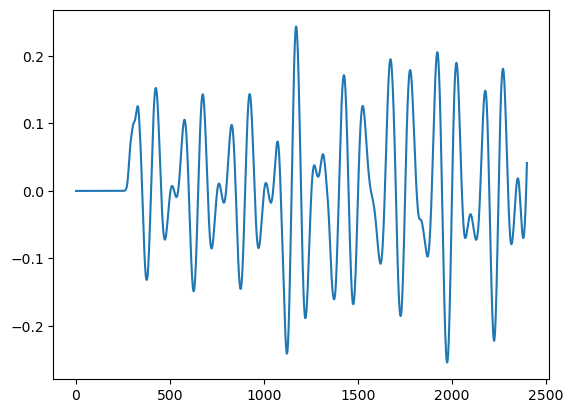

In [11]:
#Extract signal
u1_loc1 = data1['u'][:,int((1/3+1/2)/2*N_x), int((1/3+1/2)/2*N_y)]
#Plot signal
plt.plot(u1_loc1.cpu().numpy())

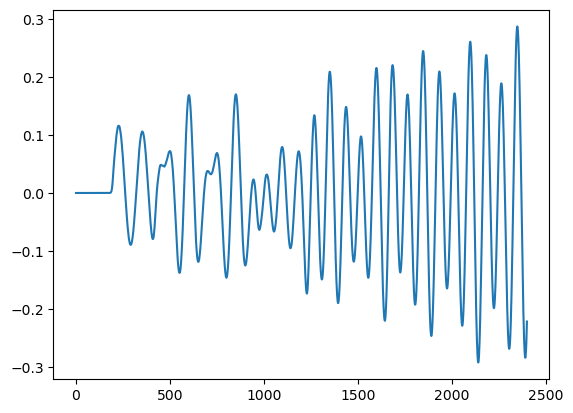

In [12]:
#Extract signal
u1_loc2 = data1['u'][:,int((1/3)*N_x), int((1/3)*N_y)]
#Plot signal
plt.plot(u1_loc2.cpu().numpy())

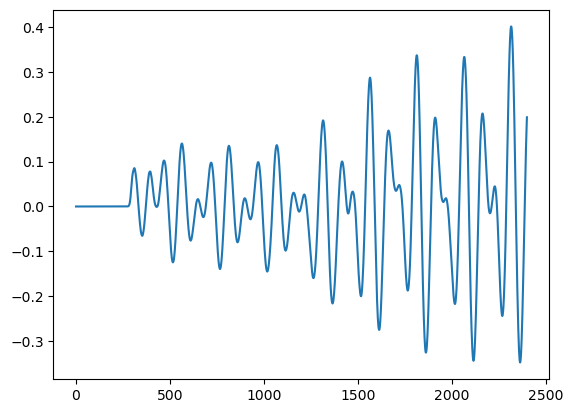

In [13]:
#Extract signal
u1_loc3 = data1['u'][:,int((1/2)*N_x), int((1/2)*N_y)]
#Plot signal
plt.plot(u1_loc3.cpu().numpy())

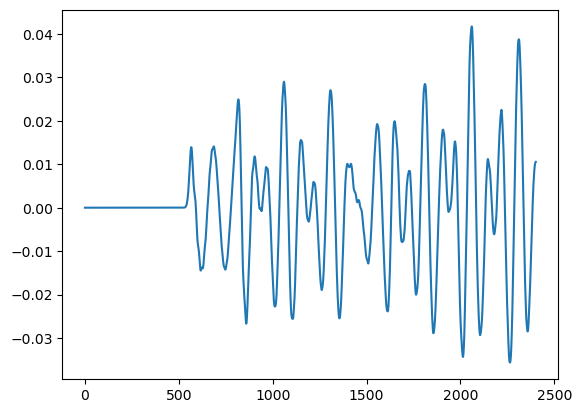

In [14]:
#Extract signal
u1_loc4 = data1['u'][:,1, int((1/3)*N_y)]
#Plot signal
plt.plot(u1_loc4.cpu().numpy())

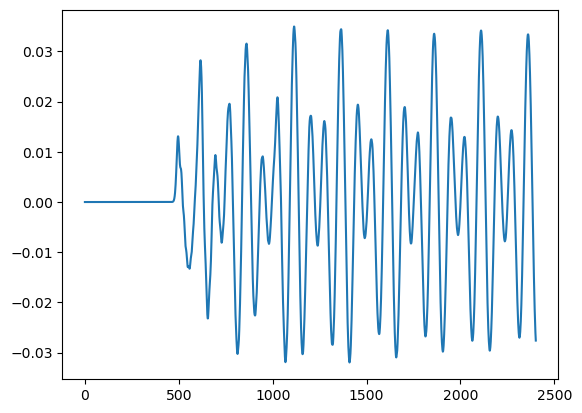

In [15]:
#Extract signal
u1_loc5 = data1['u'][:,int((1/2)*N_y), 1]
#Plot signal
plt.plot(u1_loc5.cpu().numpy())

# Put data into DataFrame

In [23]:
u1_loc1.cpu()

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0206, 0.0308, 0.0414], device='cpu')

In [24]:
df = pd.DataFrame(data={'loc1': u1_loc1.cpu(), 'loc2': u1_loc2.cpu(), 'loc3': u1_loc3.cpu(), 'loc4': u1_loc4.cpu(), 'loc5': u1_loc5.cpu()})
df

,loc1,loc2,loc3,loc4,loc5
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2397,0.001732,-0.265701,0.145992,0.010110,-0.023919
2398,0.010927,-0.257022,0.160691,0.010286,-0.025044
2399,0.020625,-0.246724,0.174435,0.010423,-0.026035
2400,0.030802,-0.234939,0.187149,0.010521,-0.026881


# Save Data

In [26]:
#Save to video
value_max = data1['u'].max().item()
name_mpr1 = 'data1.mp4'
imageio.mimwrite(name_mpr1, (255*((data1['u'].cpu()+value_max)/value_max)/2).type(torch.uint8), fps = 30/dt,
                format='mp4')

In [27]:
#Save to numpy array object
name_file1 = 'data1'
np.save(name_file1, data1)

In [32]:
#Save signals at specific locations to csv
name_file2 = 'signals.csv'
df.to_csv(name_file2, index=False)

In [29]:
torch.cuda.empty_cache()